In [66]:
!pip install scapy

In [212]:
from scapy.all import rdpcap, Raw
import datetime
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time
import copy
from scapy.compat import raw
from scapy.error import Scapy_Exception
from scapy.config import conf
from scapy.packet import Packet, bind_layers
from scapy.layers.l2 import Ether
from scapy.layers.inet import UDP
from scapy.fields import (
    XShortEnumField, BitEnumField, XBitField,
    BitField, StrField, PacketListField,
    StrFixedLenField, ShortField,
    FlagsField, ByteField, XIntField, X3BytesField
)

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy
from scapy.all import rdpcap
import datetime
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time
import copy
import statistics
from sklearn.metrics import mean_squared_error
from scapy.layers.inet import IP

fileName = "/content/drive/MyDrive/opcua-asyncio-tcc/Coletas/none_function-call-null-deref.pcapng"
userID = 'Marcio Rafael Buzoli'

packets = rdpcap(fileName)


In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
packets[2767].show2()

###[ Ethernet ]### 
  dst       = e4:5f:01:2e:1a:b6
  src       = 00:09:5b:bd:64:06
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 60
     id        = 24221
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0x1201
     src       = 192.168.164.103
     dst       = 192.168.164.101
     \options   \
###[ TCP ]### 
        sport     = 59452
        dport     = 4840
        seq       = 496205398
        ack       = 0
        dataofs   = 10
        reserved  = 0
        flags     = S
        window    = 64240
        chksum    = 0x834a
        urgptr    = 0
        options   = [('MSS', 1460), ('SAckOK', b''), ('Timestamp', (2619133051, 0)), ('NOP', None), ('WScale', 7)]



In [39]:
packets[2785].show2()

###[ Ethernet ]### 
  dst       = e4:5f:01:2e:1a:b6
  src       = 00:09:5b:bd:64:06
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 628
     id        = 24230
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0xfc0
     src       = 192.168.164.103
     dst       = 192.168.164.101
     \options   \
###[ TCP ]### 
        sport     = 59452
        dport     = 4840
        seq       = 496207592
        ack       = 2676440028
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 501
        chksum    = 0xbe03
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (2619133071, 2649627065))]
###[ Raw ]### 
           load      = '\x01\x00\x00\x00\x07N\x00\x00\x00\x01\x00\\xcd\x08\x01\x00\\xe4,\x01\x00\x00\x00\x07N\x00\x00\x00\x01\x00\\xcd\x08\x01\x00\\xe4,\x01\x00\x00\x00\x07N\x00\x00\x00\x01\x00\\xcd\x08\x01\x00\\xe4,\x01\

In [247]:

df_packets  = []
chronology_list = []
source_list = []
destination_list = []
packetID_list = []
type_list = []
size_list = []
attack = []

server = '192.168.164.101' #e4:5f:01:2e:1b:c1
client = '192.168.164.102' #e4:5f:01:2e:1a:b6
blackHat = '192.168.164.103' #00:09:5b:bd:64:06


i=0

for i in range(len(packets)):
###########################################
    source = packets[i].src
    source_list.append(source)
    destination = packets[i].dst
    destination_list.append(destination)
    packetID_list.append(i)
    payload_length = len(packets[i])
    size_list.append(payload_length)
    typeflag=packets[i].type
    type_list.append(typeflag)
    support_chronology = float(packets[i].time) - float(packets[0].time)
    support_chronology1 ='%.6f'%float(support_chronology)+'000'
    chronology_list.append(support_chronology1)
    if source == '00:09:5b:bd:64:06' and len(attack) == 0 :
      attackFlag= (support_chronology1, i)
      attack.append(attackFlag)


i = 1
timefilteredPackets = []


for i in range(len(chronology_list)):
  if chronology_list[i] != chronology_list[i-1]:
    timefilteredPackets.append(packets[i])

opcua_packets = []

for packet in timefilteredPackets:
    # Verificar se a porta de origem ou destino é 4840 (porta OPC UA)
    if packet.haslayer('IP') and (packet[IP].sport == 4840 or packet[IP].dport == 4840):
        opcua_packets.append(packet)

In [254]:
attack[0][1]

2767

In [249]:
opcua_packets[0].show2()

###[ Ethernet ]### 
  dst       = e4:5f:01:2e:1b:c1
  src       = e4:5f:01:2e:1a:b6
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 60
     id        = 0
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0x709f
     src       = 192.168.164.101
     dst       = 192.168.164.102
     \options   \
###[ TCP ]### 
        sport     = 4840
        dport     = 33670
        seq       = 3555267798
        ack       = 781613442
        dataofs   = 10
        reserved  = 0
        flags     = SA
        window    = 65160
        chksum    = 0xc4eb
        urgptr    = 0
        options   = [('MSS', 1460), ('SAckOK', b''), ('Timestamp', (1879501671, 2888207234)), ('NOP', None), ('WScale', 7)]



In [154]:
df = pd.DataFrame(zip(packetID_list,chronology_list,source_list,destination_list,type_list,size_list),
                  columns=['Packet ID','Time', 'Source','Destination', 'Type', 'Size'])

In [288]:
print(len(packets))
print(len(filteredPackets))
print(len(discarted_list))
print(len(filteredPackets)+len(discarted_list))

10169
7418
2751
10169


In [220]:

opcua_packets = []

for packet in filteredPackets:
    # Verificar se a porta de origem ou destino é 4840 (porta OPC UA)
    if packet.haslayer('IP') and (packet[IP].sport == 4840 or packet[IP].dport == 4840):
        opcua_packets.append(packet)



In [200]:
print('%.6f'%float(tde_list[710]))

0.000305


In [255]:
from scapy.all import rdpcap, Raw
import datetime
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time
import copy
from scapy.compat import raw
from scapy.error import Scapy_Exception
from scapy.config import conf
from scapy.packet import Packet, bind_layers
from scapy.layers.l2 import Ether
from scapy.layers.inet import UDP
from scapy.fields import (
    XShortEnumField, BitEnumField, XBitField,
    BitField, StrField, PacketListField,
    StrFixedLenField, ShortField,
    FlagsField, ByteField, XIntField, X3BytesField
)

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy
from scapy.all import rdpcap
import datetime
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time
import copy
import statistics
from sklearn.metrics import mean_squared_error
from scapy.layers.inet import IP

fileName = "/content/drive/MyDrive/opcua-asyncio-tcc/Coletas/none_function-call-null-deref.pcapng"
userID = 'Marcio Rafael Buzoli'

packets = rdpcap(fileName)


df_packets  = []
chronology_list = []
source_list = []
destination_list = []
packetID_list = []
type_list = []
size_list = []
attack = []

server = '192.168.164.101' #e4:5f:01:2e:1b:c1
client = '192.168.164.102' #e4:5f:01:2e:1a:b6
blackHat = '192.168.164.103' #00:09:5b:bd:64:06


i=0

for i in range(len(packets)):
###########################################
    source = packets[i].src
    source_list.append(source)
    destination = packets[i].dst
    destination_list.append(destination)
    packetID_list.append(i)
    payload_length = len(packets[i])
    size_list.append(payload_length)
    typeflag=packets[i].type
    type_list.append(typeflag)
    support_chronology = float(packets[i].time) - float(packets[0].time)
    support_chronology1 ='%.6f'%float(support_chronology)+'000'
    chronology_list.append(support_chronology1)
    if source == '00:09:5b:bd:64:06' and len(attack) == 0 :
      attackFlag= (support_chronology1, i)
      attack.append(attackFlag)


i = 1
timefilteredPackets = []


for i in range(len(chronology_list)):
  if chronology_list[i] != chronology_list[i-1]:
    timefilteredPackets.append(packets[i])

opcua_packets = []

for packet in timefilteredPackets:
    # Verificar se a porta de origem ou destino é 4840 (porta OPC UA)
    if packet.haslayer('IP') and (packet[IP].sport == 4840 or packet[IP].dport == 4840):
        opcua_packets.append(packet)

In [259]:
from scapy.all import rdpcap
from scapy.layers.inet import IP

fileName = "/content/drive/MyDrive/opcua-asyncio-tcc/Coletas/none_function-call-null-deref.pcapng"

packets = rdpcap(fileName)

chronology_list = []
size_list = []
attack = []

server = '192.168.164.101'  # e4:5f:01:2e:1b:c1
client = '192.168.164.102'  # e4:5f:01:2e:1a:b6
blackHat = '192.168.164.103'  # 00:09:5b:bd:64:06

for i in range(len(packets)):
    source = packets[i].src
    packetID = i
    payload_length = len(packets[i])
    support_chronology = float(packets[i].time) - float(packets[0].time)
    support_chronology1 = '%.6f' % float(support_chronology) + '000'
    chronology_list.append(support_chronology1)
    if source == '00:09:5b:bd:64:06' and len(attack) == 0:
        attackFlag = (support_chronology1, i)
        attack.append(attackFlag)

timefilteredPackets = []

for i in range(len(chronology_list)):
    if chronology_list[i] != chronology_list[i - 1]:
        timefilteredPackets.append(packets[i])

opcua_packets = []

for packet in timefilteredPackets:
    if packet.haslayer('IP') and (packet[IP].sport == 4840 or packet[IP].dport == 4840):
        opcua_packets.append(packet)



In [3]:
!pip install scapy
from scapy.all import rdpcap, Raw
import datetime
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time
import copy
from scapy.compat import raw
from scapy.error import Scapy_Exception
from scapy.config import conf
from scapy.packet import Packet, bind_layers
from scapy.layers.l2 import Ether
from scapy.layers.inet import UDP
from scapy.fields import (
    XShortEnumField, BitEnumField, XBitField,
    BitField, StrField, PacketListField,
    StrFixedLenField, ShortField,
    FlagsField, ByteField, XIntField, X3BytesField
)

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy
from scapy.all import rdpcap
import datetime
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time
import copy
import statistics
from sklearn.metrics import mean_squared_error
from scapy.layers.inet import IP

fileName = "/content/drive/MyDrive/opcua-asyncio-tcc/Coletas/none_chunk-flood.pcapng"
userID = 'Marcio Rafael Buzoli'

packets = rdpcap(fileName)

chronology_list = []
attack = []
i=0

for i in range(len(packets)):
###########################################
    support_chronology = float(packets[i].time) - float(packets[0].time)
    support_chronology1 ='%.6f'%float(support_chronology)+'000'
    chronology_list.append(support_chronology1)
    source = packets[i].src
    if source == '00:09:5b:bd:64:06' and len(attack) == 0 :
      attackFlag= (support_chronology1, i)
      attack.append(attackFlag)
      print('hello pimpo')


i = 1
timefilteredPackets = []


for i in range(len(chronology_list)):
  if chronology_list[i] != chronology_list[i-1]:
    timefilteredPackets.append(packets[i])
####################################################################################
####################################################################################
################lista filtrada######################################################
i=0
source_list = []
destination_list = []
packetID_list = []
type_list = []
size_list = []
filteredChronology_list = []


server = '192.168.164.101' #e4:5f:01:2e:1b:c1
client = '192.168.164.102' #e4:5f:01:2e:1a:b6
blackHat = '192.168.164.103' #00:09:5b:bd:64:06

for i in range(len(timefilteredPackets)):
###########################################
    support_chronology = float(timefilteredPackets[i].time) - float(timefilteredPackets[0].time)
    support_chronology1 ='%.6f'%float(support_chronology)+'000'
    filteredChronology_list.append('%.6f'%float(support_chronology1))

    source = timefilteredPackets[i].src
    source_list.append(source)
    destination = timefilteredPackets[i].dst
    destination_list.append(destination)
    payload_length = len(timefilteredPackets[i])
    size_list.append(payload_length)
    typeflag=timefilteredPackets[i].type
    type_list.append(typeflag)

opcua_packets = []

for packet in timefilteredPackets:
    # Verificar se a porta de origem ou destino é 4840 (porta OPC UA)
    if packet.haslayer('IP') and (packet[IP].sport == 4840 or packet[IP].dport == 4840):
        opcua_packets.append(packet)


time = float(filteredChronology_list[-1]) #se necessário
throughput_persecond = []
segment_duration = 1  # Duração do segmento em segundos

for i in range(int(time)):  # Para cada segundo
    flag0 = 0  # Reinicia flag0 para 0 a cada segundo
    for j in range(len(filteredChronology_list)):
        if float(filteredChronology_list[j]) < (i + 1) * segment_duration:  # Verifica se o valor está dentro do segmento
            flag0 += float(size_list[j])  # Soma os valores de size_list dentro do segmento
    # Subtrai os valores de size_list que já foram somados no segundo anterior
    flag0 -= sum(size_list[u] for u in range(len(size_list)) if float(filteredChronology_list[u]) < i * segment_duration)
    throughput_persecond.append(flag0)  # Adiciona o resultado à lista throughput_persecond
    flag0 = 0  # Reinicia flag0 para o próximo segundo

print(throughput_persecond)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444330 sha256=55c4697a9d8365fbcf8aa110d34091ce7e63a7f68d86747ec28dec9139002280
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


FileNotFoundError: ignored

In [448]:
attack

[('13.023266000', 2767)]

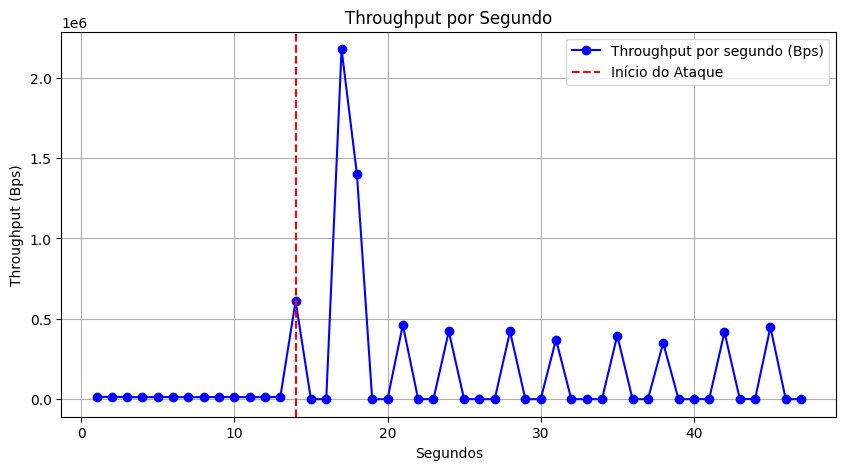

In [451]:
import matplotlib.pyplot as plt

# Dados de throughput por segundo
throughput_persecond = [14897.0, 13931.0, 13565.0, 12393.0, 13604.0, 13697.0, 12378.0, 13316.0, 13340.0, 13709.0, 12519.0, 13279.0, 13865.0, 610249.0, 132.0, 0.0, 2176482.0, 1402493.0, 198.0, 264.0, 461929.0, 291.0, 264.0, 422191.0, 525.0, 234.0, 102.0, 421349.0, 357.0, 132.0, 370861.0, 291.0, 132.0, 0.0, 396072.0, 132.0, 132.0, 349942.0, 330.0, 234.0, 960.0, 417600.0, 1412.0, 1340.0, 448906.0, 234.0, 132.0]

# Índice do ataque
attack_index = 13

# Números de segundos para o eixo x
seconds = list(range(1, len(throughput_persecond) + 1))

# Plotagem do gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(seconds, throughput_persecond, marker='o', color='b', label='Throughput por segundo (Bps)')
plt.axvline(x=attack_index + 1, color='r', linestyle='--', label='Início do Ataque')
plt.xlabel('Segundos')
plt.ylabel('Throughput (Bps)')
plt.title('Throughput por Segundo')
plt.legend()
plt.grid(True)
plt.show()


In [399]:
flag0

7660497

In [445]:
time = float(filteredChronology_list[-1]) #se necessário
throughput_persecond = []
segment_duration = 1  # Duração do segmento em segundos

for i in range(int(time)):  # Para cada segundo
    flag0 = 0  # Reinicia flag0 para 0 a cada segundo
    for j in range(len(filteredChronology_list)):
        if float(filteredChronology_list[j]) < (i + 1) * segment_duration:  # Verifica se o valor está dentro do segmento
            flag0 += float(size_list[j])  # Soma os valores de size_list dentro do segmento
    # Subtrai os valores de size_list que já foram somados no segundo anterior
    flag0 -= sum(size_list[u] for u in range(len(size_list)) if float(filteredChronology_list[u]) < i * segment_duration)
    throughput_persecond.append(flag0)  # Adiciona o resultado à lista throughput_persecond
    print(flag0)
    flag0 = 0  # Reinicia flag0 para o próximo segundo

print(throughput_persecond)


14897.0
13931.0
13565.0
12393.0
13604.0
13697.0
12378.0
13316.0
13340.0
13709.0
12519.0
13279.0
13865.0
610249.0
132.0
0.0
2176482.0
1402493.0
198.0
264.0
461929.0
291.0
264.0
422191.0
525.0
234.0
102.0
421349.0
357.0
132.0
370861.0
291.0
132.0
0.0
396072.0
132.0
132.0
349942.0
330.0
234.0
960.0
417600.0
1412.0
1340.0
448906.0
234.0
132.0
[14897.0, 13931.0, 13565.0, 12393.0, 13604.0, 13697.0, 12378.0, 13316.0, 13340.0, 13709.0, 12519.0, 13279.0, 13865.0, 610249.0, 132.0, 0.0, 2176482.0, 1402493.0, 198.0, 264.0, 461929.0, 291.0, 264.0, 422191.0, 525.0, 234.0, 102.0, 421349.0, 357.0, 132.0, 370861.0, 291.0, 132.0, 0.0, 396072.0, 132.0, 132.0, 349942.0, 330.0, 234.0, 960.0, 417600.0, 1412.0, 1340.0, 448906.0, 234.0, 132.0]
